In [1]:
from sklearn.datasets import load_breast_cancer

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import BaggingClassifier as bc
from sklearn.neighbors import KNeighborsClassifier as knc
from sklearn.model_selection import train_test_split as tts
from sklearn.metrics import confusion_matrix,classification_report

In [3]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [4]:
import warnings
warnings.filterwarnings('ignore')

In [6]:
dataset=load_breast_cancer()

In [7]:
x=dataset.data
y=dataset.target

In [8]:
xtrain,xtest,ytrain,ytest = tts(x,y,test_size=0.25,random_state=49)

In [9]:
# 1 we use normal KNeighborsclassifier
knn=knc()

In [10]:
knn.fit(xtrain,ytrain)

KNeighborsClassifier()

In [11]:
# training score
knn.score(xtrain,ytrain)

0.9483568075117371

In [12]:
# testing socre
knn.score(xtest,ytest)

0.9230769230769231

In [13]:
bag_knn=bc(knc(),n_estimators=9, max_samples=0.7, bootstrap=True,random_state=49)

In [14]:
bag_knn.fit(xtrain,ytrain)

BaggingClassifier(base_estimator=KNeighborsClassifier(), max_samples=0.7,
                  n_estimators=9, random_state=49)

In [15]:
bag_knn.score(xtest,ytest)

0.9370629370629371

In [16]:
# if bootstrap=False is called a pasting method
pas_knn=bc(knc(),n_estimators=9, max_samples=0.7, bootstrap=False,random_state=49,)

In [17]:
pas_knn.fit(xtrain,ytrain)

BaggingClassifier(base_estimator=KNeighborsClassifier(), bootstrap=False,
                  max_samples=0.7, n_estimators=9, random_state=49)

In [18]:
pas_knn.score(xtrain,ytrain)

0.9413145539906104

In [5]:
from sklearn.ensemble import RandomForestClassifier as RFC

In [7]:
df=pd.read_csv(r'https://raw.githubusercontent.com/training-ml/Files/main/cardio_train.csv',sep=';')

In [11]:
# df.to_csv('cardio_train.csv')  dataset saved

In [8]:
df.sample(4)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
1072,2504,21748,1,165,80.0,100,69,1,1,0,0,1,0
48821,70705,18212,2,171,79.0,140,90,1,1,0,0,1,1
46572,67526,22640,1,154,67.0,130,100,3,3,0,0,0,1
65678,94764,21256,2,174,88.0,120,80,2,1,0,0,1,0


In [25]:
# df.isnull().sum()  # none any nun value

In [9]:
df.shape

(69301, 13)

In [27]:
df.drop_duplicates(inplace=True)

In [10]:
import seaborn as sns

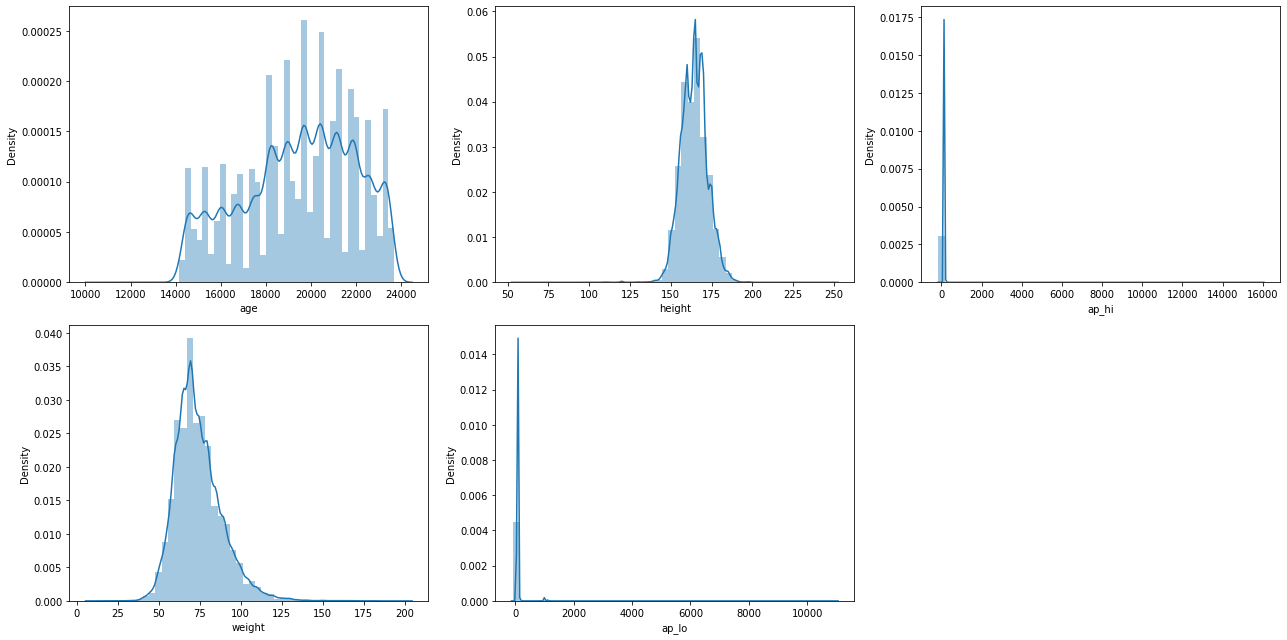

In [11]:
# check how the data skewed  and outliers
plt.figure(figsize=(18,9))
p=1
for col in df[['age','height','ap_hi','weight','ap_lo']]:
    if p<=6:
        ax=plt.subplot(2,3,p)
        sns.distplot(df[col])
        plt.xlabel(col,)
    p+=1
plt.tight_layout()

In [9]:
from scipy.stats import zscore

In [10]:
z_score=zscore(df[['age','height','ap_hi','weight','ap_lo']])  #  

In [11]:
abs_zscore=np.abs(z_score)

In [12]:
filtering= (abs_zscore < 2.85).all(axis=1)

In [13]:
df=df[filtering]

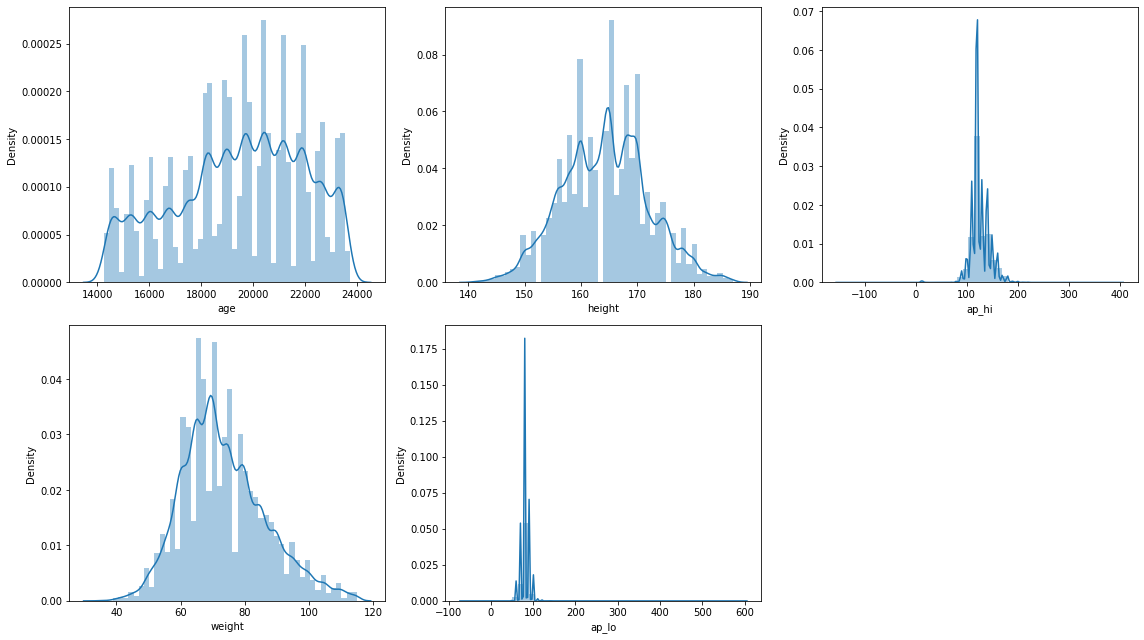

In [17]:
# we check how much data skewness remove after apply zscore method

plt.figure(figsize=(16,9))
p=1
for col in df[['age','height','ap_hi','weight','ap_lo']]:
    if p<=6:
        ax=plt.subplot(2,3,p)
        sns.distplot(df[col])
        plt.xlabel(col,)
    p+=1
plt.tight_layout()

In [ ]:
# we now visualsize to heatmap to show multicollinearity
plt.figure(figsize=(16,8))
sns.heatmap(df,annot=True)
plt.show()

In [14]:
x=df.iloc[:,1:12]

In [15]:
# df.head(3)

In [16]:
y=df['cardio']

In [17]:
xtrain,xtest,ytrain,ytest=tts(x,y,test_size=0.25,random_state=49)

In [18]:
rf=RFC()

In [19]:
# we normaly use randomforest classifier
rf.fit(xtrain,ytrain)

RandomForestClassifier()

In [20]:
# traing score
rf.score(xtrain,ytrain)

0.9997420276625721

In [21]:
# check testing score
rf.score(xtest,ytest)

0.7142516966305512

In [22]:
y_pred=rf.predict(xtest)

In [23]:
print(classification_report(ytest,y_pred))

              precision    recall  f1-score   support

           0       0.72      0.73      0.72      8614
           1       0.71      0.70      0.70      8184

    accuracy                           0.71     16798
   macro avg       0.71      0.71      0.71     16798
weighted avg       0.71      0.71      0.71     16798



In [37]:
# we use some parameter Tuning called hypertuning

In [24]:
grid={'n_estimators':[40,70,110],
     'max_depth':[6,11],'min_samples_split':[3,5,14],
      'min_samples_leaf':[1,2,4]}

In [42]:
# 1 we gridsearchcv write like this
# GridSearchCV(estimator=RFC(),param_grid=grid,cv=5)

In [25]:
# 2 method write to gridsearchcv
gcv=GridSearchCV(RFC(),grid,cv=5,n_jobs=-1)

In [26]:
gcv.fit(xtrain,ytrain)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [6, 11], 'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [3, 5, 14],
                         'n_estimators': [40, 70, 110]})

In [27]:
gcv.best_params_


{'max_depth': 11,
 'min_samples_leaf': 4,
 'min_samples_split': 14,
 'n_estimators': 70}

In [45]:
est=gcv.best_estimator_

In [46]:
est.fit(xtrain,ytrain)

RandomForestClassifier(max_depth=11, min_samples_leaf=4, min_samples_split=14,
                       n_estimators=70)

In [51]:
ypred=est.predict(xtest)

In [52]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.73      0.79      0.75      8614
           1       0.75      0.69      0.72      8184

    accuracy                           0.74     16798
   macro avg       0.74      0.74      0.74     16798
weighted avg       0.74      0.74      0.74     16798



In [49]:
#rf=RFC(max_depth=13,min_samples_leaf=5,min_samples_split=12,n_estimators=60)

In [50]:
#rf.fit(xtrain,ytrain)

In [47]:
#rf.score(xtrain,ytrain)

In [48]:
#rf.score(xtest,ytest)

In [55]:
from sklearn.linear_model import LogisticRegression as LR
from sklearn.tree import DecisionTreeClassifier as DTC
from sklearn.neighbors import KNeighborsClassifier as KNC

In [68]:
from sklearn.metrics import plot_roc_curve

In [63]:
lr=LR()
dtc=DTC()
knn=KNC()

In [64]:
lr.fit(xtrain,ytrain)
dtc.fit(xtrain,ytrain)
knn.fit(xtrain,ytrain)

KNeighborsClassifier()

In [65]:
print('lr.training_score =', lr.score(xtrain,ytrain))
print('dtc.training_score =',dtc.score(xtrain,ytrain))
print('knn.training_score =',knn.score(xtrain,ytrain))

lr.training_score = 0.6990455023515171
dtc.training_score = 0.9997817157144842
knn.training_score = 0.7774690929295736


In [66]:
print('lr.test_score =',lr.score(xtest,ytest))
print('dtc.test_score =',dtc.score(xtest,ytest))
print('knn.test_score =',knn.score(xtest,ytest))

lr.test_score = 0.7063936182878914
dtc.test_score = 0.6334087391356114
knn.test_score = 0.6821645433980236


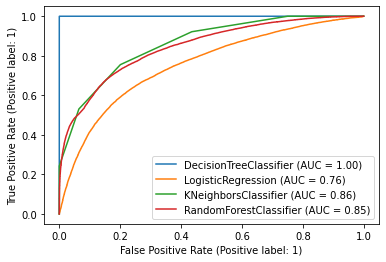

In [71]:
# we plot roc curve at training score data
# let's plot roc curve check how much better performe
disp=plot_roc_curve(dtc,xtrain,ytrain)
plot_roc_curve(lr,xtrain,ytrain,ax=disp.ax_)
plot_roc_curve(knn,xtrain,ytrain,ax=disp.ax_)
plot_roc_curve(rf,xtrain,ytrain, ax=disp.ax_)
plt.show()

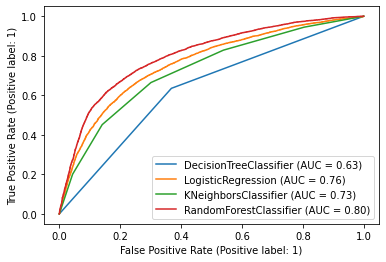

In [70]:
# we plot_roc_curve at testing score data
# let's plot roc curve check how much better performe
disp=plot_roc_curve(dtc,xtest,ytest)
plot_roc_curve(lr,xtest,ytest,ax=disp.ax_)
plot_roc_curve(knn,xtest,ytest,ax=disp.ax_)
plot_roc_curve(rf,xtest,ytest, ax=disp.ax_)


In [72]:
# over all Logistic,randomforest perform very well
# complete